In [64]:
!pip install -U -q pyarrow

# 1. Análise exploratória

## Importações.

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import math
import shutil
import pyarrow as pa
import pyarrow.parquet as pq

##  Coleta de dados

In [66]:
teto = 10
airplane = "airplane_data_025"

In [67]:
# Unindo todos os arquivos Parquet em uma única variável
folder_path = (f"/content/{airplane}")

parquet_files = [file for file in os.listdir(folder_path) if file.endswith('.parquet')]

flights = len(parquet_files)

range_max = int(math.floor(flights/teto))

In [68]:
print(range_max,flights)

8 84


## Agregação das colunas de interesse.

In [69]:
# Colunas indicadas pelos parceiros
filtered_columns = ['recording_time', 'dateDay-1', 'dateMonth-1', 'dateYear-1', 'phaseOfFlight-1',
                 'message0418DAA-1','message0422DAA-1','amscHprsovDrivF-1a', 'amscHprsovDrivF-1b',
                 'amscHprsovDrivF-2b', 'amscPrsovDrivF-1a',
                 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
                 'basBleedLowPressF-1a', 'basBleedLowPressF-2b',
                 'basBleedLowTempF-1a', 'basBleedLowTempF-2b',
                 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
                 'basBleedOverTempF-1a', 'basBleedOverTempF-2b',
                 'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b',
                 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a',
                 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
                 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
                 'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
                 'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
                 'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a',
                 'bleedMonPress-1b', 'bleedMonPress-2a', 'bleedMonPress-2b',
                 'bleedOnStatus-1a', 'bleedOnStatus-1b', 'bleedOnStatus-2b',
                 'bleedOverpressCas-2a', 'bleedOverpressCas-2b',
                 'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b',
                 'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b',
                 'bleedPrsovClPosStatus-1a', 'bleedPrsovClPosStatus-2a',
                 'bleedPrsovFbk-1a']

In [70]:
def convert_columns(df_filtered):
    for coluna in df_filtered.columns:
        if df_filtered[coluna].dtype == 'float64':
            df_filtered[coluna] = df_filtered[coluna].astype('float32')

        if df_filtered[coluna].dtype == 'int64':
            df_filtered[coluna] = df_filtered[coluna].astype('int32')

    return df_filtered

In [71]:
df_number = 0

In [72]:
# Função que combina os arquivos Parquet de uma pasta, filtra-os e os concatena.
def df_consolida(index):
    global df_number
    global flights
    step = 0
    if index < range_max:
        step = teto*index
    else:
        step = flights
    df = pd.DataFrame()
    for _, _, arquivos in os.walk(f'/content/{airplane}/'):
        #nota: para alterar o tamanho do dataset, basta alterar o valor de 250. Recomendo utilizar o valor de 250 para não estourar o tamanho da RAM do colab
        while(df_number != step):
                df_read = pd.read_parquet(f"/content/{airplane}/" + arquivos[df_number] ,engine='auto')
                df_filtered = df_read[filtered_columns]#
                df_converted = convert_columns(df_filtered)
                df = pd.concat([df, df_converted], axis=0)
                df_number = df_number + 1
        print("foi: ",len(arquivos))
    return df


In [ ]:
df_consolidado = df_consolida(1)

## Analise dos dados.

In [ ]:
df_consolidado

In [ ]:
df_consolidado.columns

In [ ]:
df_consolidado[['recording_time', 'dateDay-1', 'dateMonth-1', 'dateYear-1',
       'phaseOfFlight-1', 'message0418DAA-1', 'message0422DAA-1',
       'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b',
       'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
       'basBleedLowPressF-1a', 'basBleedLowPressF-2b']].describe()

In [ ]:
df_consolidado[['bleedFavTmCmd-1a',
       'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b',
       'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b',
       'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b',
       'bleedHprsovCmdStatus-2a', 'bleedHprsovCmdStatus-2b',
       'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b',
       'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b']].describe()

In [ ]:
df_consolidado[['bleedMonPress-1a', 'bleedMonPress-1b', 'bleedMonPress-2a',
       'bleedMonPress-2b', 'bleedOnStatus-1a', 'bleedOnStatus-1b',
       'bleedOnStatus-2b', 'bleedOverpressCas-2a', 'bleedOverpressCas-2b',
       'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b']].describe()

In [ ]:
df_consolidado[['bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b',
       'bleedPrsovClPosStatus-1a', 'bleedPrsovClPosStatus-2a',
       'bleedPrsovFbk-1a']].describe()

## Tratamento dos dados

In [88]:
df_consolidado = df_consolidado.drop(labels=[
    "basBleedOverPressF-2b",	"basBleedOverTempF-1a",	"basBleedOverTempF-2b",
     "amscHprsovDrivF-1a",	"amscHprsovDrivF-1b",	"amscHprsovDrivF-2b",	"amscPrsovDrivF-1a",	"amscPrsovDrivF-1b",	"amscPrsovDrivF-2b",	"basBleedLowPressF-1a",	"basBleedLowPressF-2b",
    "bleedOverpressCas-2a",	"bleedOverpressCas-2b", "basBleedLowTempF-1a",	"basBleedLowTempF-2b",	"basBleedOverPressF-1a"
], axis=1)

In [ ]:
df_consolidado.isna().sum()

In [ ]:
df_consolidado.describe()

In [90]:
df_training = df_consolidado.fillna(method="backfill")

In [ ]:
df_training.describe()

In [ ]:
df_training.isna().sum()

In [91]:
df_training = df_training.dropna()

In [84]:
# saving the dataframe
df_training.to_parquet('df_training.parquet', index=False)

## Analise de correlações

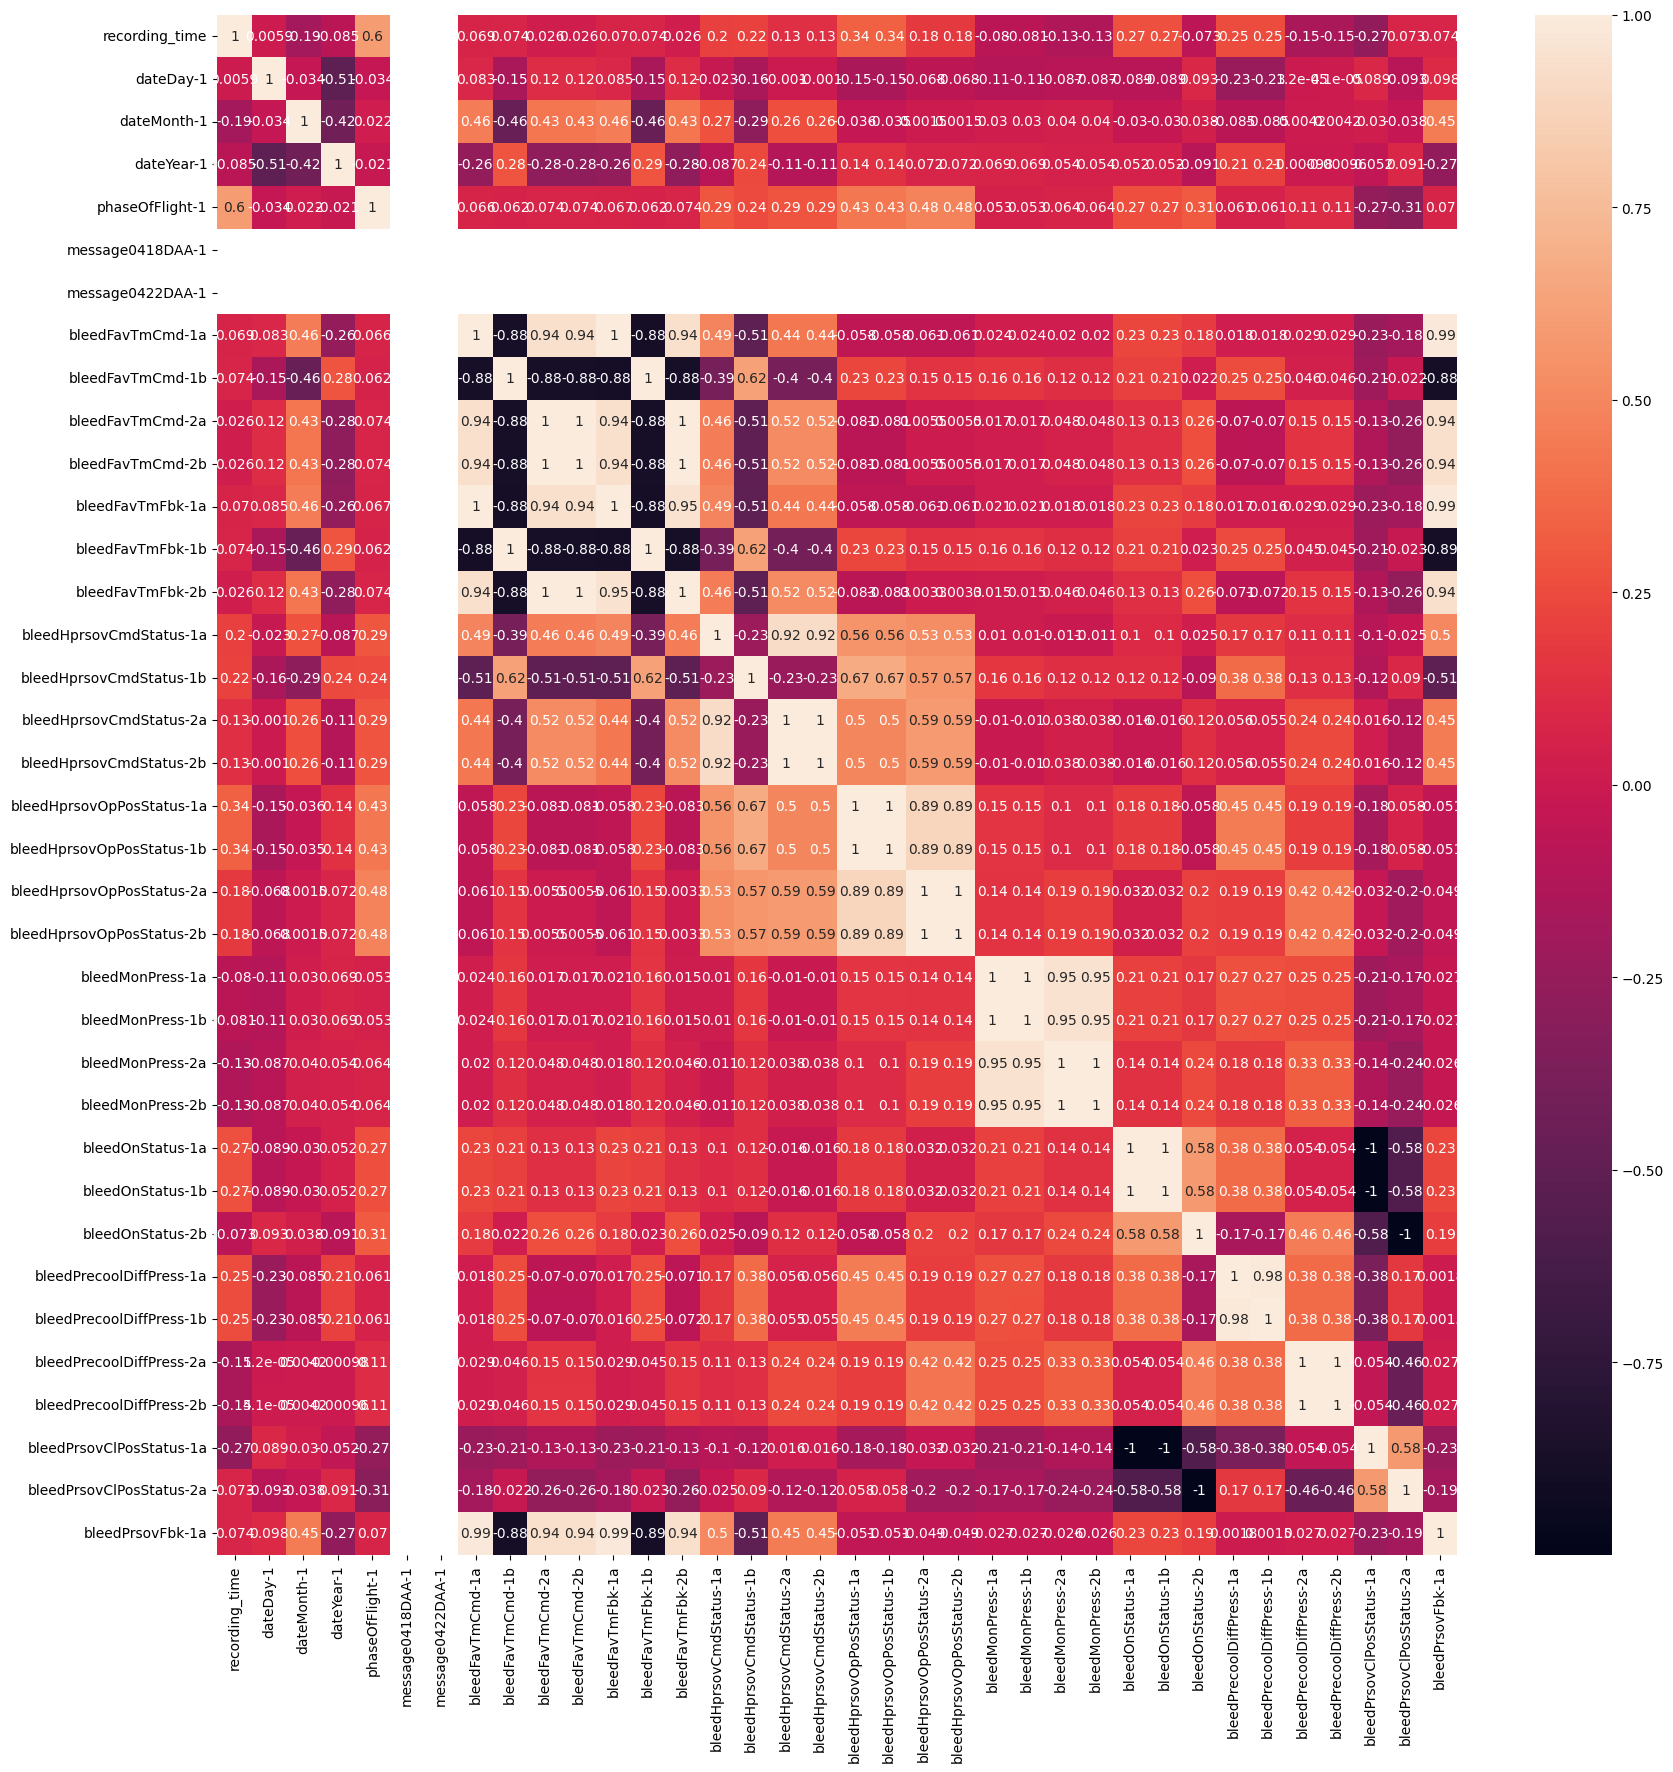

In [95]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
corr_matrix = df_training.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Após ver correlações de 100% em muitos dos componentes fui pesquisar na documentação e entendi que se trata de sensores redundantes. Sendo assim irei pegar só os componentes 1.

In [100]:
redundant = ["bleedFavTmCmd-2a", "bleedFavTmCmd-2b", "bleedFavTmFbk-2b", 'bleedHprsovCmdStatus-2a', 'bleedHprsovCmdStatus-2b',"bleedHprsovOpPosStatus-2a",
       'bleedHprsovOpPosStatus-2b','bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-2b','bleedPrecoolDiffPress-2a',
       'bleedPrecoolDiffPress-2b','bleedPrsovClPosStatus-2a']

In [101]:
df_training = df_training.drop(labels=redundant, axis=1)

In [ ]:
plt.figure(figsize = (20, 20))
corr_matrix = df_training.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()